In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
s = 0.004
u = 3.4e-5

def generation(cells, s_this, Print = True, stop = False, beginning = False):
    #runs one generation of the branching process
    
    #cells is a list of how many types of cells
    cells_next = cells.copy()
    for i in range(len(cells)):
        if(cells[i]> 0):
            #get the number died, born
            dj = ((1-s_this)**(i))/2
            bj = (1-dj)
            if (i == 0):
                if beginning: 
                    dj = 0
                    bj = 1
            die = np.int64(0)
            born = np.int64(0)
            mutate = np.int64(0)
            n = cells[i]
            while n > 1e9:
                change = np.random.multinomial(1e9, (dj, bj*(1-u), bj*u))
                die +=change[0]
                born = np.int64(born) + np.int64(change[1])
                mutate += change[2]
                n -= 1e9

            change = np.random.multinomial(int(cells[i]), (dj, bj*(1-u), bj*u))
            die +=change[0]
            born +=change[1]
            mutate += change[2]                
            
            #update died
            cells_next[i] -= np.int64(die)
            
            #update born
            cells_next[i] += np.int64(born)

            #make it so there's not negative
            if cells_next[i] < 0:
                cells_next[i] = 0

            #update mutate
            if mutate >0:
                try:
                    cells_next[i + 1] += np.int64(mutate)
                except:
                    if Print:
                        print("Mutate to next generation, end of list")
                    if stop:
                        return [0]
                    return cells_next
    return cells_next


In [76]:

# lscd_actual = []

# calculated = []
# # lscd = []
# for i in range(len(lscd_list)):
# start_time = time.time()
# lscd = lscd_list[i]
# print("lscd = ", np.log10(lscd))
# #     time = int((lscd + 2)/cell_start - 2)
# cell_start = int((lscd+2)/(2+t))
# print("time = ", t)
# print("cell_start = ", np.log10(cell_start))
# lscd_actual.append(cell_start*(2+t) - 2)


cancer_age = []

n_cancer_during = 0
n_cancer = 0

n_runs = 100000
t = 80
# lscd = 1e10
cell_start = 7.4e7
start_time = time.time()

for run in range(n_runs):
#     if(time.time() - start_time > 200): #stop if it takes too long
#         print("Timed out." , time.time()-start_time)
#         print("runs = ", run)
#         break
    if(run > n_runs/10):
        if (n_cancer_during > 0.99*run):
            break


    cells = np.array([1, 0, 0, 0], dtype=np.int64)

    cells_all = []

    for gen in range(int(np.log2(cell_start))):
        cells = generation(cells,1, Print = False, beginning = True)
        cells_all.append(cells)

    cells[0] = cell_start

    for gen in range(t):
        cells = generation(cells,s, Print = False)
        if len(cells) > 1: #check if hit the end
            cells_all.append(cells)
        else:
            going = False #Hit end of mutation list must means it survivied. 
            break 
        if(cells[-1]>1):
            #coin flip
            n = np.random.random()
            if(n < 2*s*len(cells)):
                n_cancer_during += 1
                cancer_age.append(gen)
                print(gen)
                break
            else:
                cells[-1] = 0

67
61
34
13
23
42
63
66
29
42
73
59
56
44
57
72
30
58
73
67
77
74
45
56
24
55
57
41
48
4
57
56
65
67
49
63
42
46
70
37
60
32
45
69
73
28
62
58
16
35
45
70
61
49
36
33
67
71
65
51
75
58
53
61
61
37
76
59
79
68
68
75
66
57
76
29
74
72
47
67
29
64
56
69
41
54
53
18
54
77
47
75
68
77
34
58
72
67
41
26
74
77
47
66
78
35
69
72
35
71
64
22
74
54
73
31
69
72
50
64
31
60
60
61
23
79
45


127


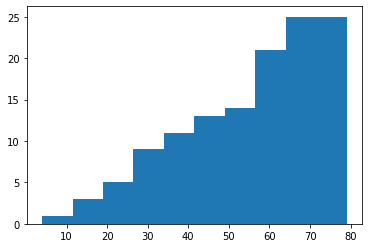

(1e-05, 0.00125)

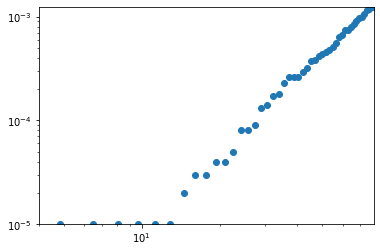

In [93]:
print(n_cancer_during)
plt.hist(cancer_age)
plt.show()

numbers = []
x_axis = np.linspace(0, max(cancer_age))
for age in x_axis:
    number = len([i for i in cancer_age if i < age])
    numbers.append(number)
#filter out 0s
for i in range(len(x_axis)-1, 0, -1):
    if(numbers[i]==0):
        numbers = numbers[i+1:]
        x_axis = x_axis[i+1:]
        break

plt.loglog(x_axis, np.array(numbers)/(n_runs), 'o')
# m = 6
# b = 10**(-15.4)
# plt.loglog(x_axis, 1/3 *b*x_axis**m)
m = 5
b = 10**(-15)
plt.loglog(x_axis, b*x_axis**m)
plt.xlim([min(cancer_age), max(cancer_age)])
plt.ylim([min([x for x in numbers if x !=0])/(n_runs), np.array(numbers)[-1]/(n_runs)])

[ 4.83673469  6.44897959  8.06122449  9.67346939 11.28571429 12.89795918
 14.51020408 16.12244898 17.73469388 19.34693878 20.95918367 22.57142857
 24.18367347 25.79591837 27.40816327 29.02040816 30.63265306 32.24489796
 33.85714286 35.46938776 37.08163265 38.69387755 40.30612245 41.91836735
 43.53061224 45.14285714 46.75510204 48.36734694 49.97959184 51.59183673
 53.20408163 54.81632653 56.42857143 58.04081633 59.65306122 61.26530612
 62.87755102 64.48979592 66.10204082 67.71428571 69.32653061 70.93877551
 72.55102041 74.16326531 75.7755102  77.3877551  79.        ]
m =  2.3542421106811338
c =  -7.35266504588484


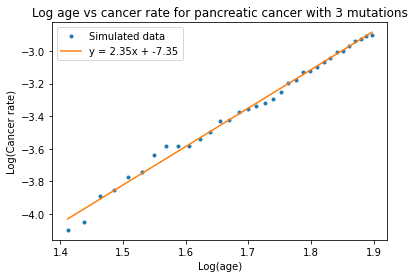

In [95]:
# for i in range(len(numbers))
x = np.log10(x_axis)
y = np.log10(np.array(numbers)/n_runs)#len(cancer_age))

for i in range(len(x_axis)):
    if(x_axis[i]>=25):
        numbers_25 = numbers[i:]
        x_axis_25 = x_axis[i:]
        break
print(x_axis)
x = np.log10(x_axis_25)
y = np.log10(np.array(numbers_25)/n_runs)

m,c = np.polyfit(x, y, 1) # fit log(y) = m*log(x) + c
# y_fit = np.e
y_fit = m*x + c#np.exp(m*x + c) # calculate the fitted values of y 
print("m = ", m)
print("c = ", c)
# z = np.arange(len(x))

plt.plot(x, y, '.')
plt.plot(x, y_fit)

# plt.xlim([np.log10(25), np.log10(80)])
# plt.ylim([min([x for x in numbers if x !=0])/len(cancer_age), np.array(numbers)[-1]/len(cancer_age)])
plt.title('Log age vs cancer rate for pancreatic cancer with 3 mutations')
plt.xlabel('Log(age)')
plt.ylabel('Log(Cancer rate)')
plt.legend(['Simulated data', 'y = '+str(round(m, 2))+'x + '+str(round(c, 2))])
plt.show()



# numbers = []
# x_axis = np.linspace(0, max(cancer_age))
# for age in x_axis:
#     number = len([i for i in cancer_age if i < age])
#     numbers.append(number)
# plt.loglog(x_axis, np.array(numbers)/len(cancer_age), 'o')